This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 2s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.6290 - accuracy: 0.8126 - val_loss: 0.3007 - val_accuracy: 0.9042
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2538 - accuracy: 0.9211 - val_loss: 0.2014 - val_accuracy: 0.9380
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1637 - accuracy: 0.9481 - val_loss: 0.1545 - val_accuracy: 0.9531
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1180 - accuracy: 0.9629 - val_loss: 0.1540 - val_accuracy: 0.9551
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0869 - accuracy: 0.9721 - val_loss: 0.1397 - val_accuracy: 0.9587
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0649 - accuracy: 0.9791 - val_loss: 0.1263 - val_accuracy: 0.9638
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0487 - accuracy: 0.9841 - val_loss: 0.1369 - val_accuracy: 0.9603
Epoch

**Plotting a validation accuracy comparison**

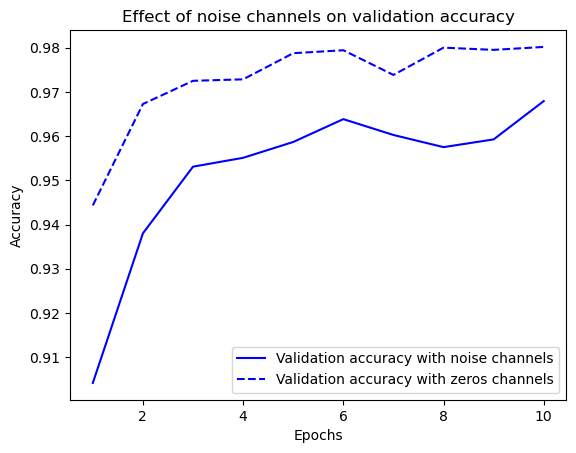

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 2.3150 - accuracy: 0.1037 - val_loss: 2.3080 - val_accuracy: 0.0978
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2991 - accuracy: 0.1165 - val_loss: 2.3130 - val_accuracy: 0.0950
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2922 - accuracy: 0.1284 - val_loss: 2.3160 - val_accuracy: 0.1007
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2809 - accuracy: 0.1372 - val_loss: 2.3268 - val_accuracy: 0.1003
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2662 - accuracy: 0.1515 - val_loss: 2.3315 - val_accuracy: 0.1000
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2482 - accuracy: 0.1605 - val_loss: 2.3492 - val_accuracy: 0.1005
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2255 - accuracy: 0.1771 - val_loss: 2.3639 - val_accuracy: 0.1023

Epoch 58/100
375/375 [==============================] - 2s 6ms/step - loss: 0.7816 - accuracy: 0.7456 - val_loss: 4.9147 - val_accuracy: 0.0988
Epoch 59/100
375/375 [==============================] - 2s 6ms/step - loss: 0.7648 - accuracy: 0.7534 - val_loss: 5.0161 - val_accuracy: 0.1012
Epoch 60/100
375/375 [==============================] - 2s 6ms/step - loss: 0.7505 - accuracy: 0.7561 - val_loss: 5.0588 - val_accuracy: 0.0955
Epoch 61/100
375/375 [==============================] - 2s 6ms/step - loss: 0.7345 - accuracy: 0.7597 - val_loss: 5.1284 - val_accuracy: 0.0943
Epoch 62/100
375/375 [==============================] - 2s 6ms/step - loss: 0.7193 - accuracy: 0.7671 - val_loss: 5.2414 - val_accuracy: 0.0964
Epoch 63/100
375/375 [==============================] - 2s 6ms/step - loss: 0.7052 - accuracy: 0.7727 - val_loss: 5.2925 - val_accuracy: 0.0962
Epoch 64/100
375/375 [==============================] - 2s 6ms/step - loss: 0.6921 - accuracy: 0.7737 - val_loss: 5.3615 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 638.2569 - accuracy: 0.3198 - val_loss: 2.8016 - val_accuracy: 0.1957
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 2.7434 - accuracy: 0.1929 - val_loss: 2.3899 - val_accuracy: 0.1301
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 2.7071 - accuracy: 0.1787 - val_loss: 2.3944 - val_accuracy: 0.1945
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 2.5737 - accuracy: 0.1794 - val_loss: 2.3543 - val_accuracy: 0.1450
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 2.4054 - accuracy: 0.1909 - val_loss: 2.1540 - val_accuracy: 0.2213
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 2.5351 - accuracy: 0.2072 - val_loss: 2.4175 - val_accuracy: 0.2375
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 2.3935 - accuracy: 0.1969 - val_loss: 2.2136 - val_accuracy: 0.2171
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3674 - accuracy: 0.9122 - val_loss: 0.1324 - val_accuracy: 0.9607
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1234 - accuracy: 0.9659 - val_loss: 0.1458 - val_accuracy: 0.9631
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0965 - accuracy: 0.9735 - val_loss: 0.1201 - val_accuracy: 0.9729
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0766 - accuracy: 0.9807 - val_loss: 0.1582 - val_accuracy: 0.9704
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0697 - accuracy: 0.9821 - val_loss: 0.1788 - val_accuracy: 0.9705
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0621 - accuracy: 0.9844 - val_loss: 0.2008 - val_accuracy: 0.9685
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0568 - accuracy: 0.9865 - val_loss: 0.1715 - val_accuracy: 0.9754
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6561 - accuracy: 0.8407 - val_loss: 0.3563 - val_accuracy: 0.9038
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.9038 - val_loss: 0.3090 - val_accuracy: 0.9139
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3171 - accuracy: 0.9115 - val_loss: 0.2928 - val_accuracy: 0.9172
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3011 - accuracy: 0.9158 - val_loss: 0.2843 - val_accuracy: 0.9204
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2918 - accuracy: 0.9181 - val_loss: 0.2794 - val_accuracy: 0.9222
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2848 - accuracy: 0.9204 - val_loss: 0.2756 - val_accuracy: 0.9237
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2801 - accuracy: 0.9220 - val_loss: 0.2727 - val_accuracy: 0.9265
Epoch 

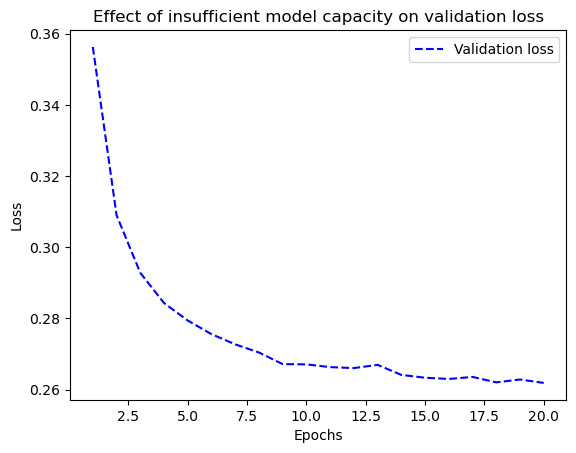

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3606 - accuracy: 0.8996 - val_loss: 0.1743 - val_accuracy: 0.9501
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1563 - accuracy: 0.9534 - val_loss: 0.1292 - val_accuracy: 0.9595
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1097 - accuracy: 0.9671 - val_loss: 0.1071 - val_accuracy: 0.9678
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0837 - accuracy: 0.9753 - val_loss: 0.1013 - val_accuracy: 0.9703
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0684 - accuracy: 0.9791 - val_loss: 0.0971 - val_accuracy: 0.9700
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0558 - accuracy: 0.9830 - val_loss: 0.0929 - val_accuracy: 0.9745
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.1000 - val_accuracy: 0.9718
Epoch 

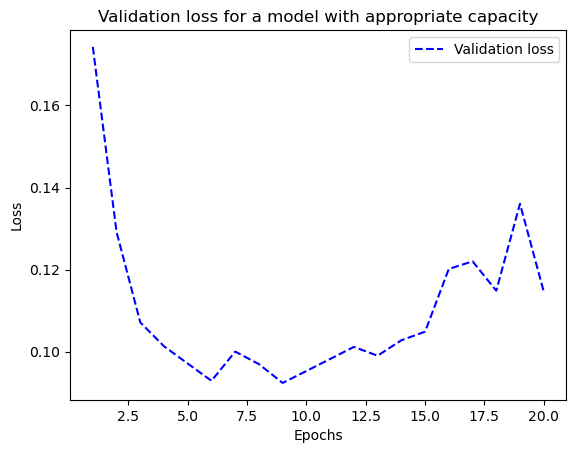

In [10]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Validation loss for a model with appropriate capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.5667 - accuracy: 0.7531 - val_loss: 0.4350 - val_accuracy: 0.8613
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3618 - accuracy: 0.8881 - val_loss: 0.3368 - val_accuracy: 0.8811
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2688 - accuracy: 0.9126 - val_loss: 0.3012 - val_accuracy: 0.8820
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2128 - accuracy: 0.9326 - val_loss: 0.2942 - val_accuracy: 0.8833
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1766 - accuracy: 0.9425 - val_loss: 0.2772 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1505 - accuracy: 0.9524 - val_loss: 0.2931 - val_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1302 - accuracy: 0.9583 - val_loss: 0.2947 - val_accuracy: 0.8860
Epoch 8/20
30

**Version of the model with lower capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5973 - accuracy: 0.7551 - val_loss: 0.5151 - val_accuracy: 0.8449
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4469 - accuracy: 0.8755 - val_loss: 0.4177 - val_accuracy: 0.8676
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3595 - accuracy: 0.9001 - val_loss: 0.3598 - val_accuracy: 0.8793
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3005 - accuracy: 0.9114 - val_loss: 0.3236 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2595 - accuracy: 0.9212 - val_loss: 0.3007 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2279 - accuracy: 0.9309 - val_loss: 0.2870 - val_accuracy: 0.8901
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2029 - accuracy: 0.9365 - val_loss: 0.2779 - val_accuracy: 0.8922
Epoch 8/20
30

**Version of the model with higher capacity**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 87ms/step - loss: 0.5612 - accuracy: 0.7327 - val_loss: 0.3630 - val_accuracy: 0.8469
Epoch 2/20
30/30 [==============================] - 2s 73ms/step - loss: 0.3248 - accuracy: 0.8627 - val_loss: 0.3725 - val_accuracy: 0.8375
Epoch 3/20
30/30 [==============================] - 2s 73ms/step - loss: 0.2390 - accuracy: 0.9053 - val_loss: 0.3977 - val_accuracy: 0.8383
Epoch 4/20
30/30 [==============================] - 2s 74ms/step - loss: 0.1888 - accuracy: 0.9251 - val_loss: 0.2689 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 2s 74ms/step - loss: 0.1325 - accuracy: 0.9531 - val_loss: 0.3582 - val_accuracy: 0.8607
Epoch 6/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1041 - accuracy: 0.9609 - val_loss: 0.3512 - val_accuracy: 0.8764
Epoch 7/20
30/30 [==============================] - 2s 73ms/step - loss: 0.0819 - accuracy: 0.9730 - val_loss: 0.3472 - val_accuracy: 0.8856
Epoch 8/20
30

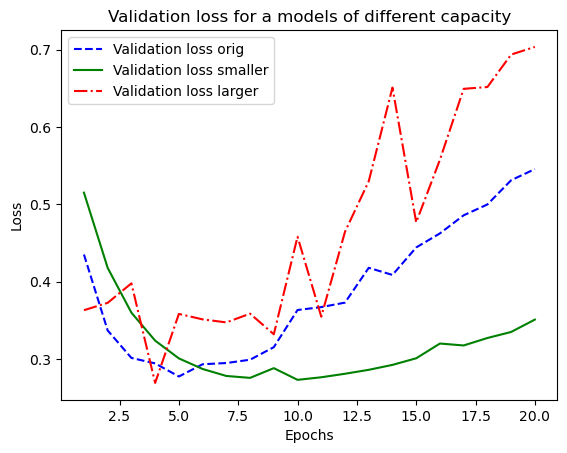

In [15]:
val_loss_orig = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
val_loss_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_orig, "b--",
         label="Validation loss orig")
plt.plot(epochs, val_loss_smaller, "g-",
         label="Validation loss smaller")
plt.plot(epochs, val_loss_larger, "r-.",
         label="Validation loss larger")
plt.title("Validation loss for a models of different capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [16]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 40ms/step - loss: 0.6304 - accuracy: 0.7781 - val_loss: 0.5112 - val_accuracy: 0.8486
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4290 - accuracy: 0.8868 - val_loss: 0.4243 - val_accuracy: 0.8662
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3478 - accuracy: 0.9083 - val_loss: 0.3945 - val_accuracy: 0.8717
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3083 - accuracy: 0.9191 - val_loss: 0.3663 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2822 - accuracy: 0.9305 - val_loss: 0.3658 - val_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2682 - accuracy: 0.9355 - val_loss: 0.3664 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2514 - accuracy: 0.9427 - val_loss: 0.3686 - val_accuracy: 0.8838
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [17]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 28ms/step - loss: 0.6384 - accuracy: 0.6398 - val_loss: 0.5446 - val_accuracy: 0.8227
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5248 - accuracy: 0.7620 - val_loss: 0.4157 - val_accuracy: 0.8670
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4380 - accuracy: 0.8142 - val_loss: 0.3520 - val_accuracy: 0.8778
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3802 - accuracy: 0.8450 - val_loss: 0.3178 - val_accuracy: 0.8813
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3384 - accuracy: 0.8687 - val_loss: 0.2896 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2952 - accuracy: 0.8903 - val_loss: 0.2769 - val_accuracy: 0.8899
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2661 - accuracy: 0.9000 - val_loss: 0.2731 - val_accuracy: 0.8902
Epoch 8/20
30

## Summary